In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\villemaj\OneDrive - Oulun ammattikorkeakoulu\Data Analysis\Test data\openpowerlifting-2023-08-12\openpowerlifting-2023-08-12-9f1b3427.csv", parse_dates=["Date"], index_col="Date")
df.reset_index(inplace=True)
df

C:\Users\villemaj\AppData\Local\Temp\ipykernel_28764\2276833968.py:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\villemaj\OneDrive - Oulun ammattikorkeakoulu\Data Analysis\Test data\openpowerlifting-2023-08-12\openpowerlifting-2023-08-12-9f1b3427.csv", parse_dates=["Date"], index_col="Date")


,Date,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,...,Goodlift,Tested,Country,State,Federation,ParentFederation,MeetCountry,MeetState,MeetTown,MeetName
0,2019-05-11,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,...,57.10,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
1,2019-05-11,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,...,56.76,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
2,2019-05-11,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,...,41.24,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
3,2019-05-11,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,...,66.68,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
4,2019-05-11,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,...,39.34,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956811,2016-11-14,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,...,93.16,Yes,Ukraine,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956812,2016-11-14,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,...,90.57,Yes,Hungary,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956813,2016-11-14,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,...,88.89,Yes,Netherlands,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956814,2016-11-14,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,...,72.24,Yes,England,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships


In [3]:
df.columns

Index(['Date', 'Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'],
      dtype='object')

t = 102.1408040375788
p = 0.0


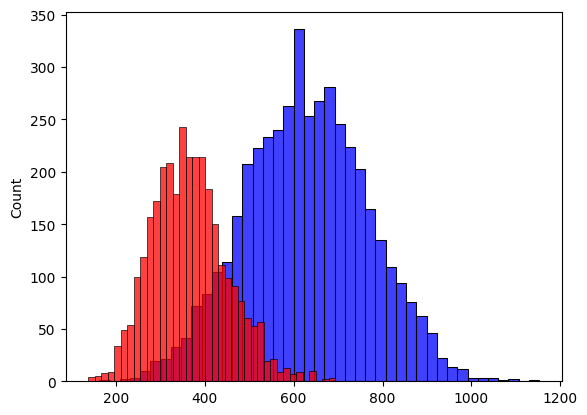

In [5]:
#hypothesis 1: men lift more than women, compare men and women groups
#use TotalKg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#two sample datasets as lists

sample1 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()
sample2 = df['TotalKg'].loc[(df['Sex'] == 'F') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()

#plot the data
sns.histplot(sample1, color='blue')
sns.histplot(sample2, color='red')

t, p = stats.ttest_ind(sample1, sample2, equal_var=False)
print("t = " + str(t))
print("p = " + str(p))

In [ ]:
import pandas_gbq #pip install pandas-gbq
import pandas as pd

project_id = 'southern-silo-370012'

sql = """
SELECT Name
FROM 'powerlifting.my_table'
LIMIT 1000
"""
df = pandas_gbq.read_gbq(sql, project_id=project_id)
df